# FaIR Model v1.6
## - Demo notebook: Sept. 2020


The Finite Amplitude Impulse Response (FaIR) model is a simple emissions-based, globally-averaged climate model. It allows the user to input emissions of greenhouse gases and short lived climate forcers in order to estimate global mean **atmospheric GHG concentrations**, **radiative forcing** and **temperature anomalies**. </br>

Read the docs: https://readthedocs.org/projects/fair/downloads/pdf/latest/



## Basic imports

- **Numpy** is a library built on top of C which allows you to perform rapid numerical calculations in Python and generate/manipulate arrays and matrices in a similar way to in MATLAB. <br>


- **Matplotlib** is the canonical plotting package in Python; as you might have guessed by the name, it's basically an open-source version of MATLAB's plotting functions. <br>
    - The '%matplotlib inline' comment just allows normal plotting within the Jupyter notebooks

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import fair

# Check we're using v1.6.0c0 
print(f"We're using FaIR version {fair.__version__}") 

# The "engine" of fair is fair_scm, stored in the fair.forward class
from fair.forward import fair_scm

We're using FaIR version 1.6.0c0


## Workflow

The general workflow for using the FaIR model is actually quite straightforward once you get set up:

 - Specify the emissions timeseries going into `fair_scm`. <br>
 - Choose the settings (`useMultigas=True/False` etc). <br>
     - If running with multiple emissions sources, then the emissions input is multidimensional, and we set `useMultigas=True`. <br>
 - Run the model. <br>
 - Plot! <br>
 
The output from FaIR is a 3-tuple of (C, F, T) arrays. In CO2-only mode, both C (representing CO2 concentrations in ppm) and F (total effective radiative forcing in W m-2) are 1D arrays. T (temperature change since the pre-industrial) is always output as a 1D array.

# Basic Example run - CO2 only

Let's try a basic run where we only vary CO2 emissions! Aside from this, there will be no external forcing (no volcanic etc) and also no other emission sources (no other GHGs/aerosols etc).

### Step 1: Set up idealised emissions time-series

To start with, lets see how our simple climate model responds to an instantaneous "pulse" of carbon / **C0$_{2}$**! </br>

To do this, let's create an emissions timeseries 100 years long, and inject a 100 GtC/yr pulse of carbon a couple of years in.

In [80]:
co2_emissions     = np.zeros(100)
co2_emissions[10] = 100 # GtC/yr

### Step 2: Now, run the model!

The outputs are: 

`C`: Concentrations </br>
`F`: Effective Radiative forcing</br>
`T`: Temp anomaly</br>
 
Additionally, the model outputs some other parameters related to feedbacks and the ocean response (`lambda_eff`, `ohc`, `heatflux`). </br>
However, we don't need these, so just ignore them for now :)
 

In [81]:
# Now, run the model!

C, F, T, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False
)

### Step 3: Plot!

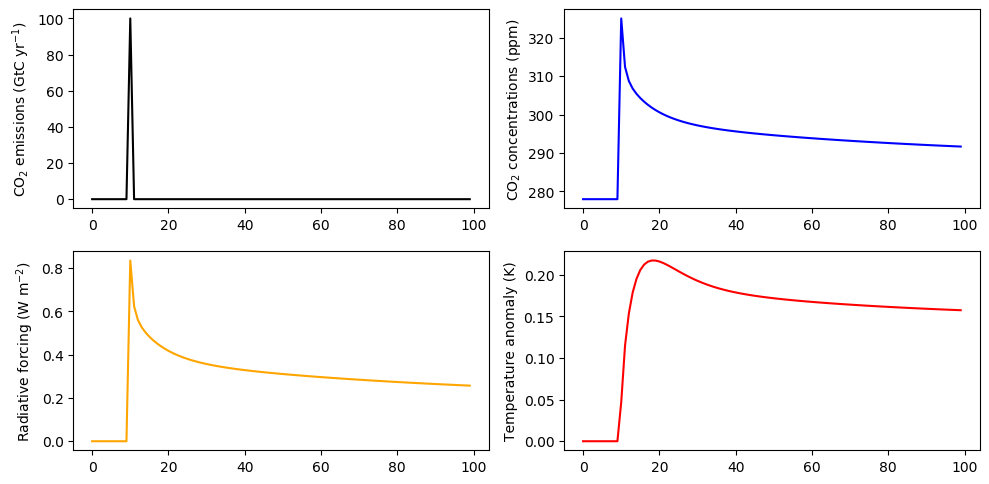

In [82]:
# --- Plot the output! ---
fig, axs = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(10,5))

# Create time axis
time = np.arange(0, co2_emissions.size)

# Emissions
axs[0,0].plot(time, co2_emissions, color='black')
axs[0,0].set_ylabel(r'CO$_{2}$ emissions (GtC yr$^{-1}$)')

# Concentrations
axs[0,1].plot(time, C, color='blue')
axs[0,1].set_ylabel(r'CO$_2$ concentrations (ppm)')

# Radiative Forcing
axs[1,0].plot(time, F, color='orange')
axs[1,0].set_ylabel(r'Radiative forcing (W m$^{-2}$)')

# Temperature Anomaly 
axs[1,1].plot(time, T, color='red')
axs[1,1].set_ylabel('Temperature anomaly (K)')

fig.tight_layout() # Cleans up the labels so they don't overlap

## Exercise #1

1) Extend the length of the emissions timeseries and re-run the model. What fraction of the emitted CO2 remains in the atmosphere after 10, 100 and 250 years (approximately)?

2) How do the shapes of the CO2 concentration and warming curves change as the duration of the pulse is increased?

 Put

 Answers

 Here

#### Now, a few things are instantly clear from this.

1) Even a single, 1-year pulse of CO$_{2}$ has a big influence!</br>
 - CO$_{2}$ concentrations and their radiative forcing perturbation can hang around and affect temperatures for centuries! </br>
 
2) The temperature response to forcing is mediated by **two, distinct timescales**:</br>
 - There's a *fast response*, which is related to the adjustment time of the atmosphere and ocean mixed-layer. </br>
 - And there's also a *slow response*, which is related - you guessed it! - to the much slower adjustment time of the deep ocean. </br> 
 
This is because the deep ocean has an "effective" heat capacity of $\sim \mathcal{100-150} \text{ W yr m}^{-2} \text{K}^{-1}$, whereas the effective heat capacity of the upper ocean/atmosphere is closer to $\sim \mathcal{7-8} \text{ W yr m}^{-2} \text{K}^{-1}$

## Exercise #2

Now, let's test how sensitive the previous results are to changes in these two "effective" ocean heat capacities!

To do this, we can add the `ocean_heat_capacity` argument to our `fair_scm` call. This has to be a 2-element array where the elements refer to the upper and deep ocean heat capacities, respectively. The default values are shown below.


```python
C_new, F_new, T_new, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    ocean_heat_capacity=np.array([8.2, 109.0]), # Default values in [W yr m^-2 K^-1]
)
```

**Have a think: What physical phenomena affect these parameters for the real Earth?**

#### Answers below...

In [89]:
co2_emissions     = np.zeros(100)
co2_emissions[10] = 100 # GtC/yr

# Now, run the model!
C, F, T, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False
)

Cshort, Fshort, Tshort, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    ocean_heat_capacity=np.array([8.2*2, 109.0]),
)

Clong, Flong, Tlong, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    ocean_heat_capacity=np.array([8.2, 109.0*2]),
)

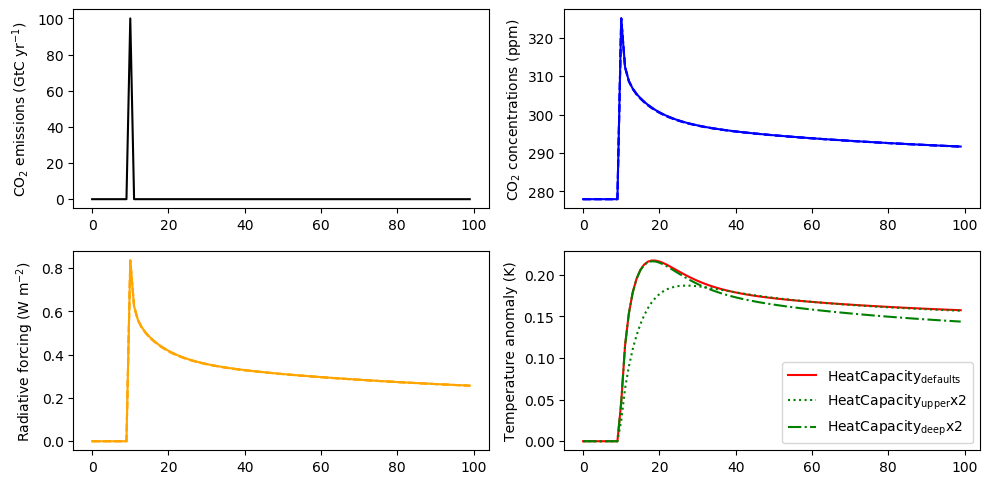

In [90]:
# --- Plot the output! ---
fig, axs = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(10,5))

# Create time axis
time = np.arange(0, co2_emissions.size)

# Emissions
axs[0,0].plot(time, co2_emissions, color='black')
axs[0,0].set_ylabel(r'CO$_{2}$ emissions (GtC yr$^{-1}$)')

# Concentrations
axs[0,1].plot(time, C, color='blue')
axs[0,1].plot(time, Cshort, linestyle='--', color='blue')
axs[0,1].plot(time, Clong, linestyle='--', color='blue')

axs[0,1].set_ylabel('CO$_2$ concentrations (ppm)')

# Radiative Forcing
axs[1,0].plot(time, F, color='orange')
axs[1,0].plot(time, Fshort, linestyle='--', color='orange')
axs[1,0].plot(time, Flong, linestyle='--', color='orange')

axs[1,0].set_ylabel('Radiative forcing (W m$^{-2}$)')

# Temperature Anomaly 
axs[1,1].plot(time, T, color='red', label=r'HeatCapacity$_{\mathrm{defaults}}$')
axs[1,1].plot(time, Tshort, linestyle=':', color='green', label=r'HeatCapacity$_{\mathrm{upper}}$x2')
axs[1,1].plot(time, Tlong, linestyle='-.', color='green', label=r'HeatCapacity$_{\mathrm{deep}}}$x2')

axs[1,1].set_ylabel('Temperature anomaly (K)')

axs[1,1].legend(loc='best')

fig.tight_layout() # Cleans up the labels so they don't overlap

# Climate Feedbacks and Uncertainty

Many aspects of the climate system change as we increase CO$_{2}$ and raise temperature, these are called "feedbacks". </br> 

The basic idea is that the net radiative imbalance ($\Delta \mathrm{R}$) due to different components of the climate changes *with* global warming. </br>  

 > Recall from Johannes' and Philip's lecture: $\Delta \mathrm{R}(t) = \mathcal{E} - \lambda \Delta \mathrm{T}_{\mathrm{s}}(t)$ </br>
 
 > Therefore, for a given radiative forcing the temperature change at equilibrium (i.e. $\Delta \mathrm{R}=0$) is given by: $T_{eq} = \frac{\mathcal{E}}{\lambda}$ 
 
 > So, a "large" $\lambda$ means the temperature response of the climate to forcing is low, whereas a "small" $\lambda$ means the climate is *very sensitive* to forcing.

**For example:** </br>

 - 1) **The "Planck" feedback:** As the temperature increases, the emission of infrared radiation back into space increases proportional to $\sim \, T_{earth}^{4}$. This increases the amount of outgoing radiation as the Earth warms. **--> "Positive" feedback**
 
 - 2) **Snow and sea-ice cover**: Intuitively, snow and ice cover decreases with warming, and this reduces the reflectivity of the Earth (the *albedo*). This then reduces the amount of radiation emitted to space. **--> "Negative" feedback**
 
 - 3) **Low cloud changes**: How low-level clouds respond to climate changes is *very* uncertain, but currently we expect that tropical low clouds will become slightly less reflective as the planet warms, amplifying the warming. **--> "Positive" feedback** </br>
 
### Results from CMIP5 and CMIP6 models
Mathematically, for an individual component of the climate system, we can write the "feedback parameter", $\lambda$, as its derivative of forcing with respect to temperature, measured in $[\text{W} \, \text{m}^{-2} \, \text{K}^{-1}]$: </br>

$$\boxed{\lambda_{component} = \frac{d \Delta R_{component}}{d T_{s}}}$$ </br>

The latest results from the CMIP5 and CMIP6 models (Zelinka et al. 2020, below - *note the reversed sign*) suggest a total feedback parameter of $\boxed{\lambda_{global} = \sum_{i} \lambda_{i} = 1.13 \pm 0.28 \, [\text{W} \, \text{m}^{-2} \, \text{K}^{-1}]}$.

<center>
<img src="zelinka_feedback_decomp.jpg" width="800"/>
</center> </br>

**However the uncertainty is mostly dominated by model disagreement over the shortwave cloud feedback.**

## Question:

#### 1) What other feedbacks can you think of which might increase uncertainty?

#### 2) For a simple pulse injection of $\mathrm{CO}_{2}$, what range of temperatures can you get by changing the `lambda_global` argument?

For example:

```python
C, F, T_lambda, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    lambda_global = 5, # CMIP5 range: 1.18 ± 0.31
)
```

Can you explain the results you get?

In [91]:
""" --- Answers BELOW --- """
# Can also use the F2x argument to change the forcing
# CMIP5 range: F2x = 3.7 ± 0.9 

C3, F3, T3, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    lambda_global = 1.13, # 1.18 ± 0.31
    F2x=3.44, # 3.7 ± 0.9 
    ocean_heat_capacity=np.array([8.2, 109.0]),
)

C4, F4, T4, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    lambda_global = 1.13+0.28, # CMIP5: 1.13 ± 0.28 
    F2x=3.44, # CMIP5: 3.44 ± 0.48 W m-2
    ocean_heat_capacity=np.array([8.2, 109.0]),
)

C5, F5, T5, _,_,_ = fair_scm(
    emissions=co2_emissions,
    temperature_function='Geoffroy',
    useMultigas=False,
    lambda_global = 1.13-0.28, # 1.18 ± 0.31
    F2x=3.44, # 3.7 ± 0.9 
    ocean_heat_capacity=np.array([8.2, 109.0]),
)

# Make a list of the different outputs
Concs    = [C3, C4, C5]
Forcings = [F3, F4, F5]
Temps    = [T3, T4, T5]

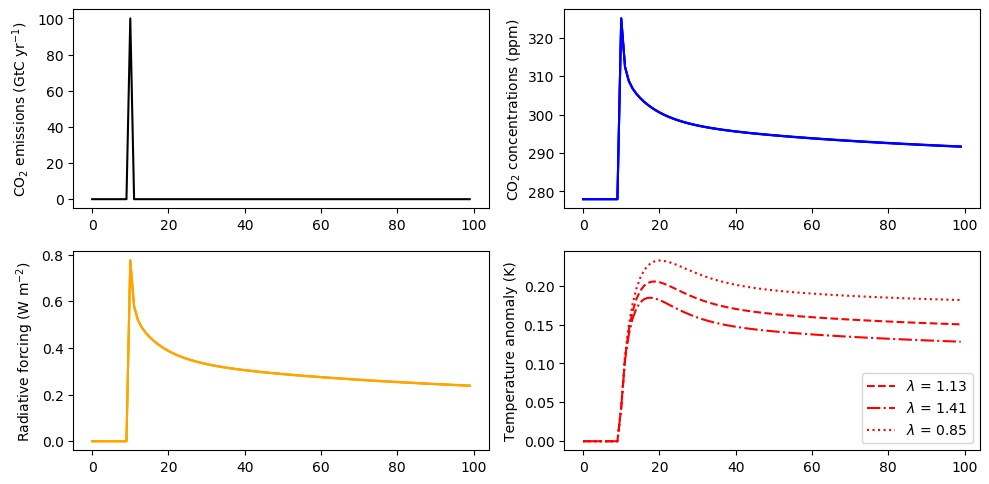

In [95]:
# --- Plot the output! ---
fig, axs = plt.subplots(ncols=2, nrows=2, dpi=100, figsize=(10,5))

# Create time axis
time = np.arange(0, co2_emissions.size)

# Emissions
axs[0,0].plot(time, co2_emissions, color='black')
axs[0,0].set_ylabel(r'CO$_{2}$ emissions (GtC yr$^{-1}$)')

# Concentrations
for c in Concs:
    axs[0,1].plot(time, c, color='blue')
axs[0,1].set_ylabel('CO$_2$ concentrations (ppm)')

# Radiative Forcing
for f in Forcings:
    axs[1,0].plot(time, f, color='orange')
axs[1,0].set_ylabel('Radiative forcing (W m$^{-2}$)')

# Temperature Anomaly 
label = ['1.13', '1.41', '0.85']
styles= ['--', '-.', ':']
for idx, t in enumerate(Temps):
    axs[1,1].plot(time, t, color='red', linestyle=styles[idx], label=fr"$\lambda$ = {label[idx]}")
axs[1,1].set_ylabel('Temperature anomaly (K)')
axs[1,1].legend()

fig.tight_layout() # Cleans up the labels so they don't overlap

# What's next? - Aerosols and other multiple forcing scenarios

So, now we've got a sense of how the climate system responds to a simple pulse of **CO$_{2}$**, but in reality the atmosphere is composed of multiple different gases and forcing agents. (E.g. Methane, Sulphate/Black Carbon aerosols, CFCs etc) </br>

Luckily, we can include these in `FaIR` using the `useMultigas=True` option!

#### Workflow changes

This time the emissions input is a `(nt, 40)` array, with the 40 different columns corresponding to different forcing agents. See [this page](https://fair.readthedocs.io/en/latest/examples.html#emissions) for a list of what each column corresponds to. </br></br>

**Example: Setting up a custom emissions array**

```python
emissions = np.zeros((150, 40))

# Column 0 is the years!
emissions[:,0] = np.arange(1850, 2000) # 1850,1851,...

# Column 1 is the CO2, in GtC/yr
emissions[:,1] = 10 

# Add some methane to column 3, in Mt/yr
emissions[:,3] = 300.

# aerosols, Mt/yr
emissions[:,5] = 0.1*np.arange(150)   # SOx
emissions[:,9] = 6.    # BC

# And so on...
```

### Example: A pulse injection of sulphur oxides ($\mathrm{SO}_{\mathrm{x}}$)

Sulphur oxides (eg. $\mathrm{SO}_{\mathrm{2}}$) are the main precursors of **sulphate aerosol**, so what we're really doing here is injecting a short pulse of aerosol into our idealized "climate".</br>

These aerosols scatter incoming solar radiation, causing a *global dimming* effect which can cool the planet and offset some of the warming caused by increased GHGs.</br>

**N.B.** The `aerosol_forcing="stevens"` argument means that `FaIR` is using the *very* simple aerosol radiative forcing parameterization we introduced before.</br>

In [64]:
"""Set up emissions time series"""
emissions_pulse = np.zeros((300, 40)) 

# Column 0 is year.
emissions_pulse[:,0] = np.arange(1850,2150)    

# Column 5 is SOX emissions, Mt/yr
# Inject 100 Mt pulses in years 100-110
emissions_pulse[:,5][100:110] = 100.     
    
""" Scale all other forcings to zero except aerosol """
scale = np.zeros(13) # all other forcing (methane etc) = 0
scale[8] = 1. # aerosol forcing = 1

""" Run model """
C_pulse,F_pulse,T_pulse,_,_,_ = fair_scm(emissions_pulse,
                                        temperature_function='Geoffroy',
                                        natural=np.array([209.2492,11.1555]), # natural emissions of CH4 and N2O
                                        aerosol_forcing="stevens",            # use simple parameterization from Stevens (2015)
                                        scale=scale,                          # ignore all non-aerosol forcings
                                        F_volcanic=0,                         # turn volcanic forcing off
                                        F_solar=0,                            # turn solar forcing off
                                        )


Text(0, 0.5, 'Temperature change [K]')

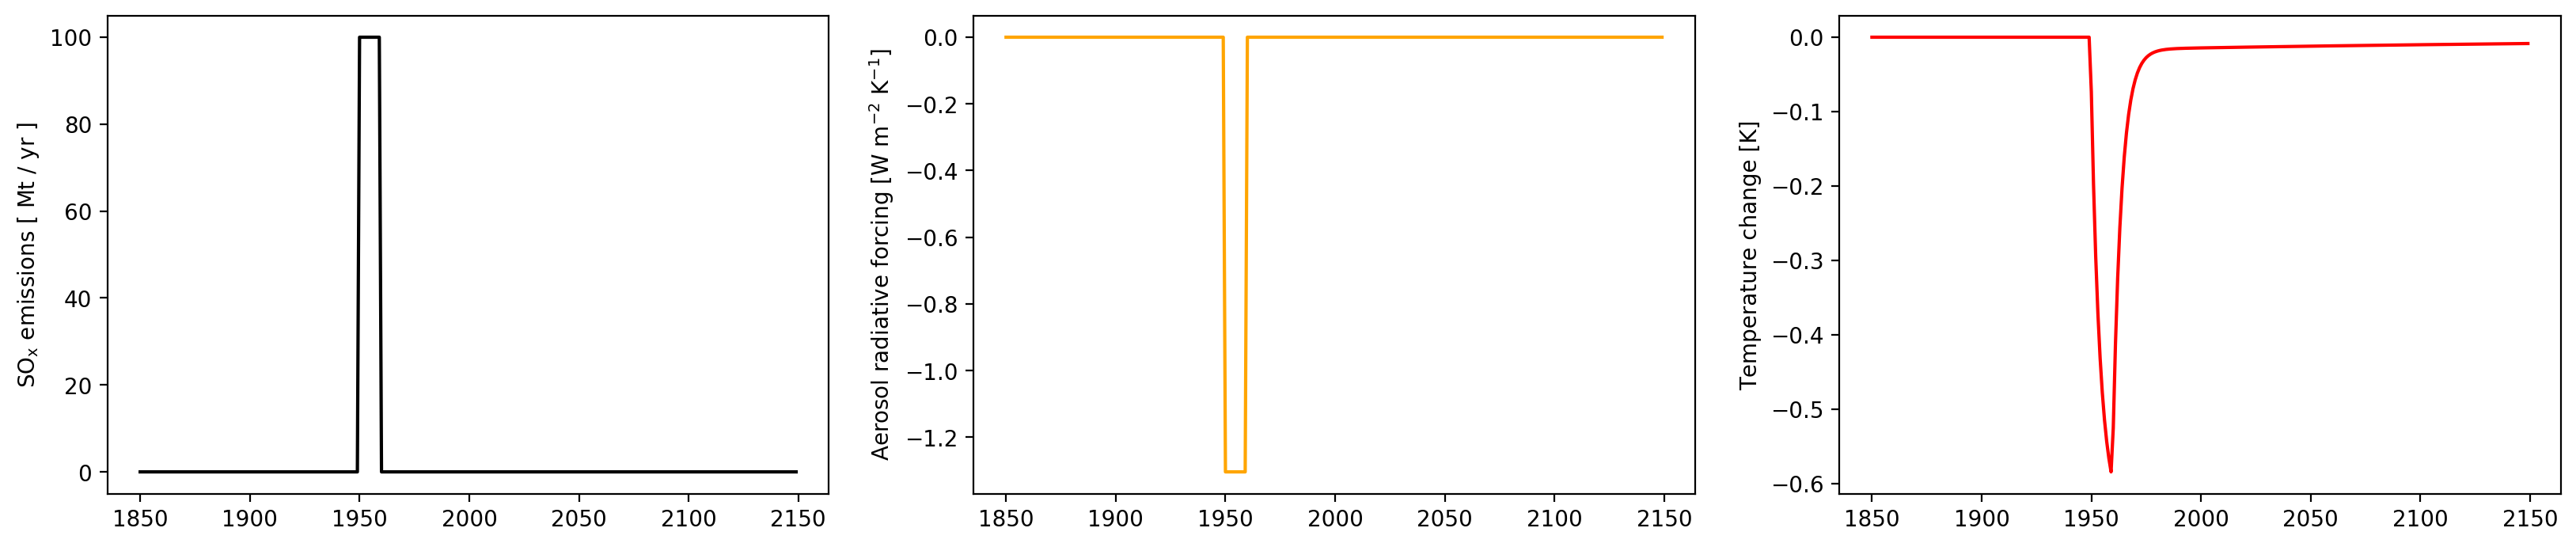

In [65]:
""" --- Plot the output! --- """

fig, ax = plt.subplots(ncols=3, dpi=200, figsize=(20, 4))

# Plot 
ax[0].plot(emissions[:,0], emissions_pulse[:,5], color='black')
ax[0].set_ylabel(r"$\mathrm{SO}_{\mathrm{x}}$ emissions [ Mt / yr ]")


ax[1].plot(emissions[:,0], F_pulse[:,8], color='orange')
ax[1].set_ylabel(r"Aerosol radiative forcing [W m$^{-2}$ K$^{-1}$]")

ax[2].plot(emissions[:,0], T_pulse, color='red')
ax[2].set_ylabel(r"Temperature change [K]")


What do you notice about the response of the radiative forcing and temperature changes? How is this different from the GHG response? </br>

1) Timescales?
 - How long does this last?

2) Temperature change?

 - How does the size of the temperature perturbation compare with a similar magnitude GHG injection?

# Did someone say "geo-engineering"?! 
### - How much sulphate injection do you require to offset a single pulse-injection of $\mathrm{CO}_{\mathrm{2}}$?

- **Set up another emissions timeseries like in the above example, but this time also include a 100 $\mathrm{GtC}$ $\mathrm{ yr}^{-1}$ pulse of carbon a couple of decades in.** </br>
Remember this line from before...
```python
# Column 1 is CO2, GtC/yr. 
emissions[:,1][20] = 100  
```
</br>

- **In 1950, add a pulse of sulphate aerosol precursor ($\mathrm{SO}_{\mathrm{x}}$).**

### (1) How much $\mathrm{SO}_{\mathrm{x}}$ is required to offset the warming from the initial GHG pulse? How long does this last for? </br>

In [66]:
"""Set up emissions time series"""
emissions = np.zeros((300, 40)) 

# Column 0 is year.
emissions[:,0] = np.arange(1850,2150)    

# Column 1 is CO2, GtC/yr. 
emissions[:,1][20] = 100   

# Column 5 is SOX emissions, Mt/yr
# Inject a 100 Mt pulses in years 100-110
emissions[:,5][100] = 100.     
    
""" Scale all other forcings to zero except aerosol """
scale = np.zeros(13) # all other forcing (methane etc) = 0
scale[0] = 1. # co2 forcing = 1
scale[8] = 1. # aerosol forcing = 1

""" Run model """
C,F,T,_,_,_ = fair.forward.fair_scm(emissions,
    temperature_function='Geoffroy',
    natural=np.array([209.2492,11.1555]), # natural emissions of CH4 and N2O
    aerosol_forcing="stevens",
    scale=scale,
    F_volcanic=0,                       # turn volcanic forcing off
    F_solar=0,                          # turn solar forcing off
    )


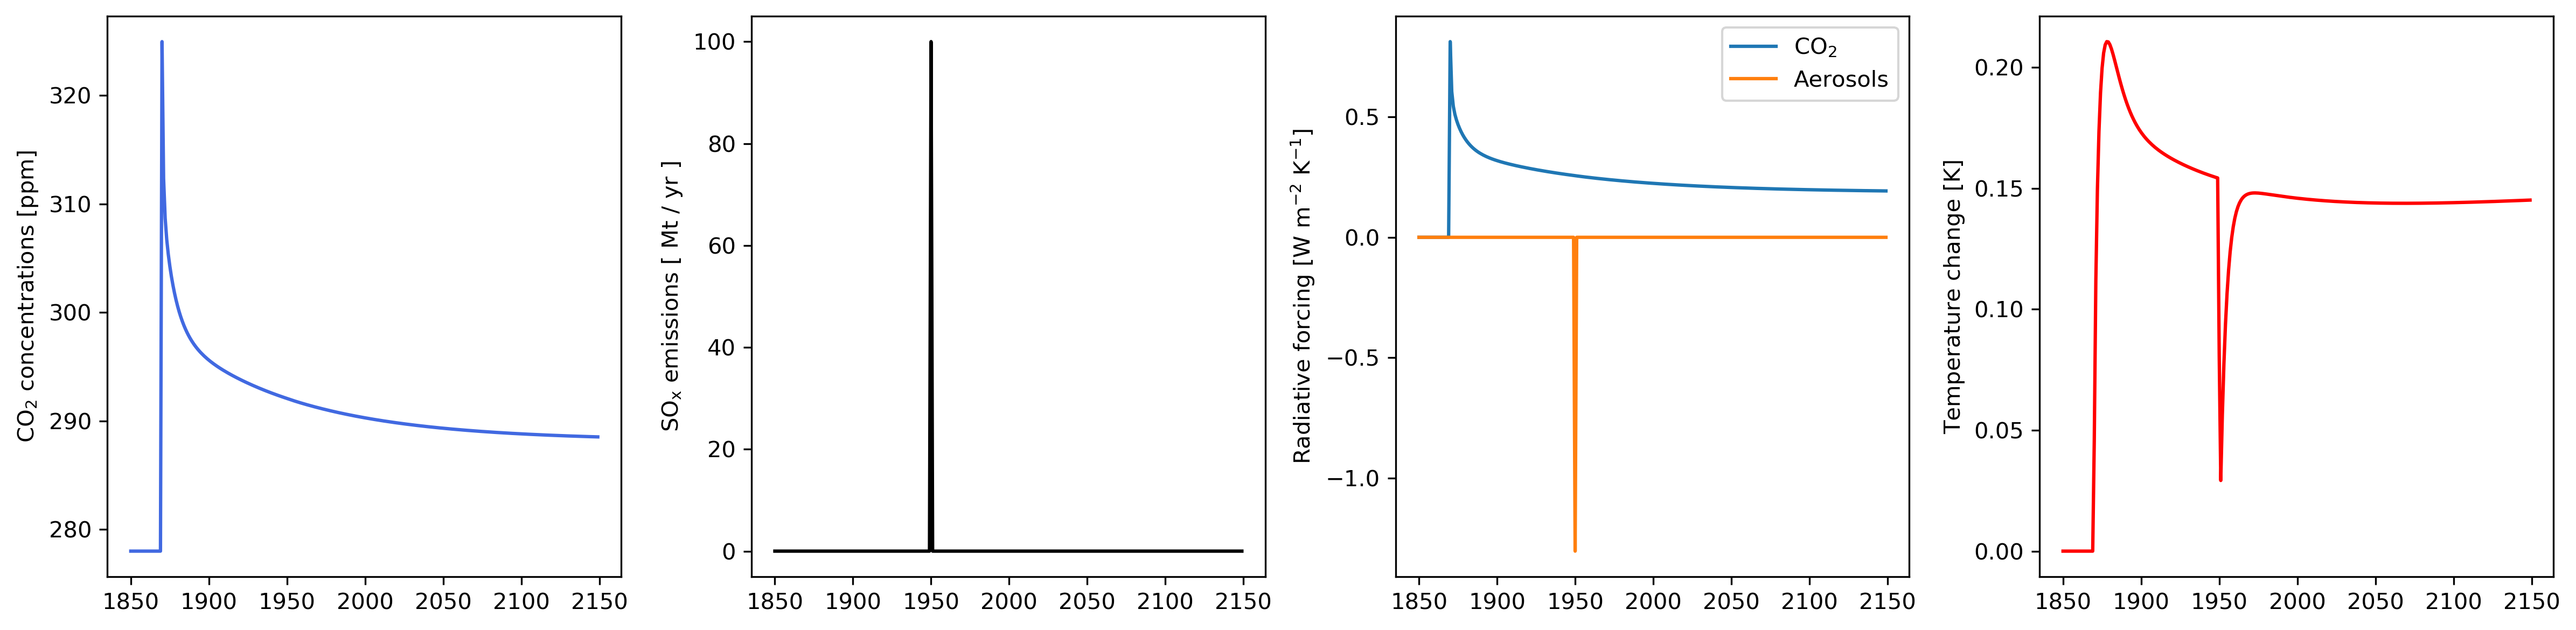

In [67]:
""" --- Plot the output! --- """

fig, ax = plt.subplots(ncols=4, dpi=300, figsize=(16, 4))

# Plot CO2 concs
ax[0].plot(emissions[:,0], C[:,0], color='royalblue')
ax[0].set_ylabel(r"$\mathrm{CO}_{\mathrm{2}}$ concentrations [ppm]")

# Plot SOx emissions
ax[1].plot(emissions[:,0], emissions[:,5], color='black')
ax[1].set_ylabel(r"$\mathrm{SO}_{\mathrm{x}}$ emissions [ Mt / yr ]")

# Plot RF
ax[2].plot(emissions[:,0], F[:,0], label=r'$\mathrm{CO}_{\mathrm{2}}$')
ax[2].plot(emissions[:,0], F[:,8], label=r'Aerosols') #-F[:,8][0]
ax[2].set_ylabel(r"Radiative forcing [W m$^{-2}$ K$^{-1}$]")
ax[2].legend()

# Plot dT
ax[3].plot(emissions[:,0], T, color='red')
ax[3].set_ylabel(r"Temperature change [K]")

fig.tight_layout()

### (2) Now, instead of adding a pulse injection of $\mathrm{SO}_{\mathrm{x}}$, change it to a steady emission rate. 

### Can you stabilize global temperatures?? 

#### Extension: How much harder is it if CO2 emissions increase with time? 
For example
```python
emissions = np.zeros((300, 40)) 

# Column 0 is year.
emissions[:,0] = np.arange(1850,2150) 

# Column 1 is CO2, GtC/yr.
emissions[:,1]=0.02*np.arange(300) 
```

In [111]:
"""Set up emissions time series"""
emissions = np.zeros((300, 40)) 

# Column 0 is year.
emissions[:,0] = np.arange(1850,2150)    

# Column 1 is CO2, GtC/yr. 
#emissions[:,1][20] = 100 
emissions[:,1] = 0.02*np.arange(300)   

# Column 5 is SOX emissions, Mt/yr
emissions[:,5][100:] = 10.
    
""" Scale all other forcings to zero except aerosol """
scale = np.zeros(13) # all other forcing (methane etc) = 0
scale[0] = 1. # co2 forcing = 1
scale[8] = 1. # aerosol forcing = 1

""" Run model """
C,F,T,_,_,_ = fair.forward.fair_scm(emissions,
    temperature_function='Geoffroy',
    natural=np.array([209.2492,11.1555]), # natural emissions of CH4 and N2O
    aerosol_forcing="stevens",
    scale=scale,
    F_volcanic=0,                       # turn volcanic forcing off
    F_solar=0,                          # turn solar forcing off
    )

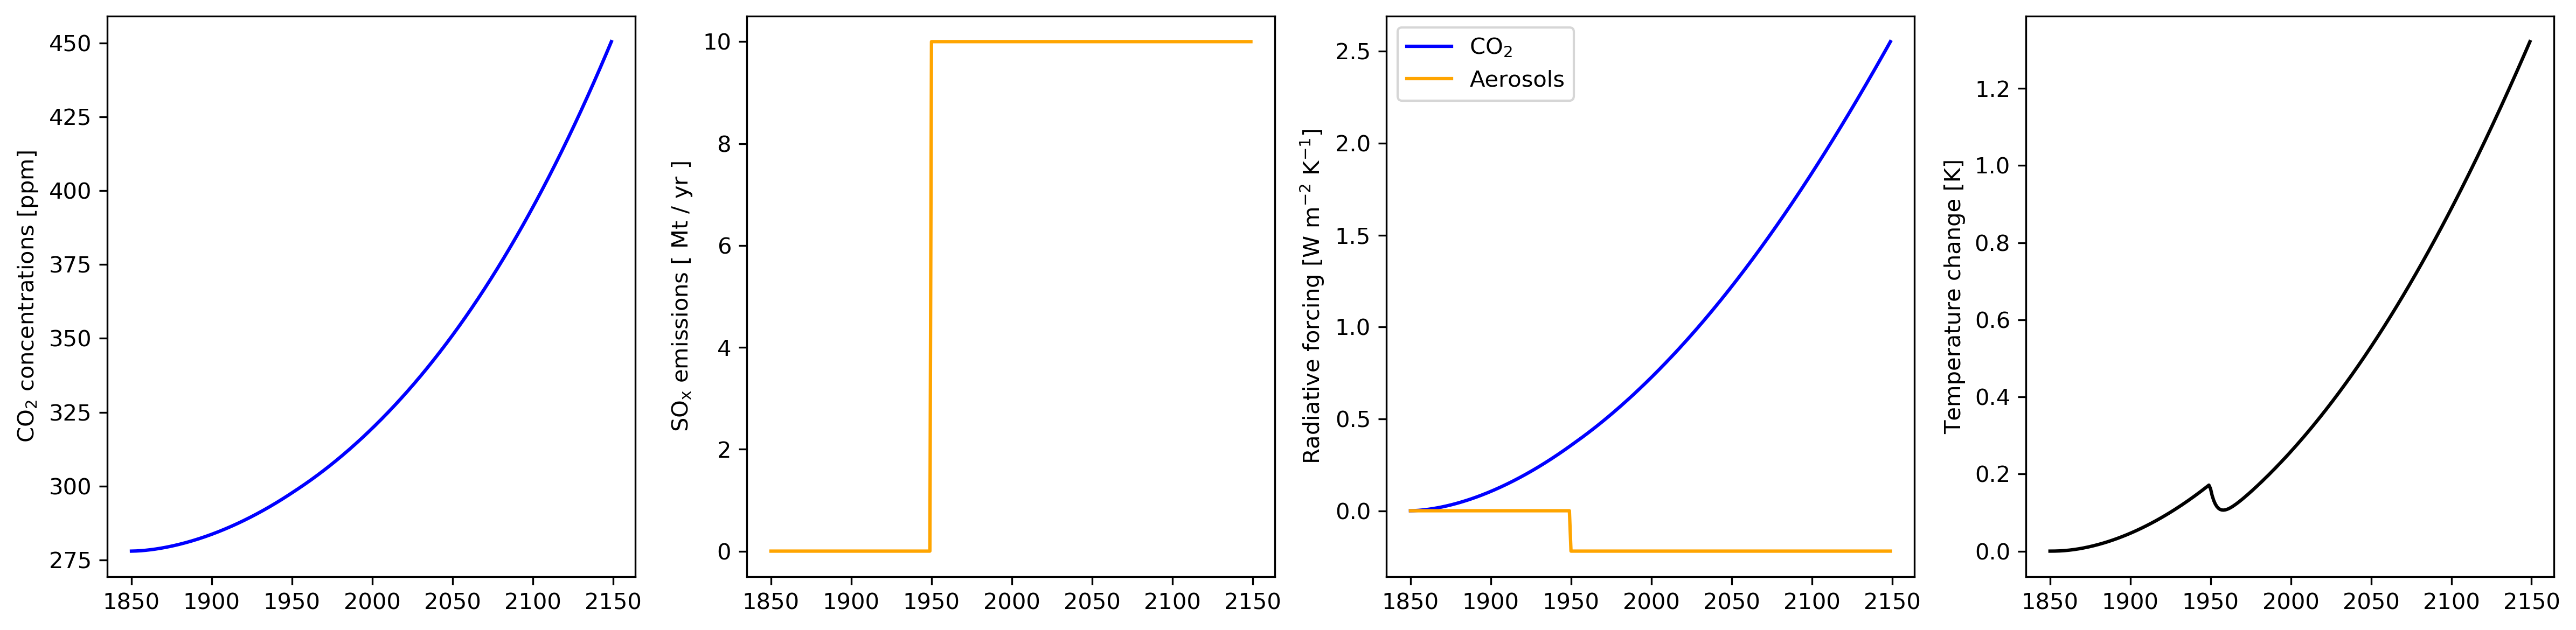

In [112]:
""" --- Plot the output! --- """

fig, ax = plt.subplots(ncols=4, dpi=300, figsize=(16, 4))

# Plot CO2 concs
ax[0].plot(emissions[:,0], C[:,0], color='blue')
ax[0].set_ylabel(r"$\mathrm{CO}_{\mathrm{2}}$ concentrations [ppm]")

# Plot SOx emissions
ax[1].plot(emissions[:,0], emissions[:,5], color='orange')
ax[1].set_ylabel(r"$\mathrm{SO}_{\mathrm{x}}$ emissions [ Mt / yr ]")

# Plot RF
ax[2].plot(emissions[:,0], F[:,0], color='blue',label=r'$\mathrm{CO}_{\mathrm{2}}$')
ax[2].plot(emissions[:,0], F[:,8], color='orange',label=r'Aerosols')
ax[2].set_ylabel(r"Radiative forcing [W m$^{-2}$ K$^{-1}$]")
ax[2].legend()

# Plot dT
ax[3].plot(emissions[:,0], T, color='black')
ax[3].set_ylabel(r"Temperature change [K]")

fig.tight_layout()

# Section 3 - Simulating historical 20th century temperatures

## Observations

We have a good handle on what global temperature was during the historical period (read: the 20$^{\mathrm{th}}$ century), you can see a plot of the global, annual-mean temperature below. The warming is clear to see, and should make it all the stranger that climate deniers still manage to exist.

In [70]:
#Read in observations, and remove 1861-80 climatology
Y_obs, T_obs = np.genfromtxt("HadCRUT.4.5.0.0.annual_ns_avg.txt")[:,0], np.genfromtxt("HadCRUT.4.5.0.0.annual_ns_avg.txt")[:,1]
i_obs_clm=(1861<=Y_obs) & (Y_obs<=1880)
T_obs=T_obs-np.mean(T_obs[i_obs_clm])

Text(0, 0.5, 'Temperature anomaly [K]')

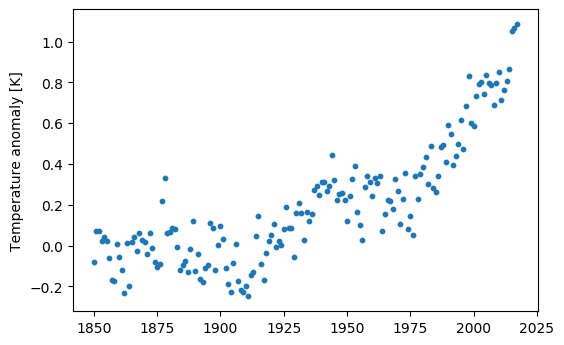

In [71]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(Y_obs, T_obs, s=10)
ax.set_ylabel("Temperature anomaly [K]")

#### Now, let's try and simulate this historical temperature record using `FaIR` and see how well it does! 

#### To do that, we'll need to make use of the "Representative Concentration Pathways"

### 3.1 - The Representative Concentration Pathways (RCPs)

For more realistic multiGas scenarios, setting up a 40-column emissions timeseries every time you want to run `FaIR` is a lot of work! </br>

Lucky for us though, `FaIR` already has some "IPCC-approved" multi-species scenarios coded up! These are called the *Representative Concentration Pathways* (RCPs). </br>

**These RCPs contain all the same data on emissions/forcings over the 20$^{\mathrm{th}}$ century, and then extrapolate into the future under various different socio-economic scenarios.** </br>

In [72]:
# Get RCP modules
from fair.RCPs import rcp85

In [73]:
""" Run model """
C,F,T_fair,_,_,_ = fair_scm(rcp85.Emissions.emissions,
                           temperature_function='Geoffroy',
                           aerosol_forcing="stevens",
                           )

# Remove 1861-80 climatology
T_fair_anom = T_fair - np.mean(T_fair[1861-1765:1880-1765])

# Just select years from 1850-2017
T_fair_anom = T_fair_anom[1850-1765:2018-1765] 

Text(0.1, 0.7, 'Error = 0.14 K')

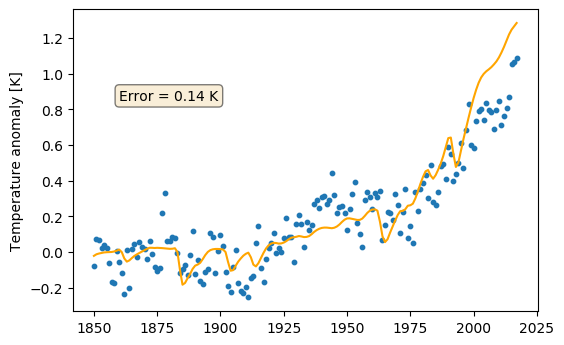

In [74]:
""" Compare observations and model-predictions """

fig, ax = plt.subplots(dpi=100)

ax.scatter(Y_obs, T_obs, s=10)           # Obs
ax.plot(Y_obs, T_fair_anom, 'orange')    # FaIR

ax.set_ylabel("Temperature anomaly [K]")

# Calculate standard deviation between model and obs
error = round(np.std(T_obs - T_fair_anom), 2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.1, 0.7, f"Error = {error} K", transform=ax.transAxes, bbox=props)

## "What's going on?": A simple decomposition

At the moment, this is a little bit of a black box! But thankfully, we can **decompose the changes** in forcing and temperature into contributions from:

- Greenhouse gases </br>

- Aerosols

- Natural variability (volcanos etc)

Decomposing the forcing and temperature changes like this means we can get a clearer picture of what's happening!

In [75]:
""" Set model parameters """
lambda_global = 1.13                       # Default = 1.13 [W m^-2 K^-1]
ocean_heat_capacity=np.array([8.2, 109.0]) # Defaults = 8.2, 109.0 [W yr m^-2 K^-1]

"""Set scalings for the anthropogenic GHG and aerosol and natural forcings (defaults=1.0)"""
scale_ghg = 1.0
scale_aer = 1.0
scale_nat = 1.0


""" Run model """
_,F_output,_,_,_,_ = fair_scm(rcp85.Emissions.emissions,
                           temperature_function='Geoffroy',
                           aerosol_forcing="stevens",
                           lambda_global = lambda_global,
                           )

# Subset to 1850-2017
F_output = F_output[1850-1765:2018-1765, :]

""" Decompose forcings into GHGs, aerosols and natural forcing """
F_ghg = F_output[:,0] +F_output[:,1]+F_output[:,2]+F_output[:,3]+F_output[:,7]
F_aer = F_output[:,6]+F_output[:,8]+F_output[:,9] # F_output[:,4]+F_output[:,5]
F_nat = F_output[:,10]+F_output[:,11]+F_output[:,12]
F_tot = F_ghg+F_aer+F_nat

""" Re-run model to get temperature response due to decomposed forcings """
_,_,T_ghg,_,_,_ = fair_scm(emissions=False,
                       other_rf=F_ghg,
                       temperature_function='Geoffroy',
                       aerosol_forcing="stevens",
                       useMultigas=False,
                       lambda_global = lambda_global, 
                       scale=scale_ghg
                       )

_,_,T_aer,_,_,_ = fair_scm(emissions=False,
                       other_rf=F_aer,
                       temperature_function='Geoffroy',
                       aerosol_forcing="stevens",
                       useMultigas=False,
                       lambda_global = lambda_global, 
                       scale=scale_aer
                       )


_,_,T_nat,_,_,_ = fair_scm(emissions=False,
                       other_rf=F_nat,
                       temperature_function='Geoffroy',
                       aerosol_forcing="stevens",
                       useMultigas=False,
                       lambda_global = lambda_global, 
                       scale=scale_nat
                       )

T_tot = T_ghg + T_aer + T_nat

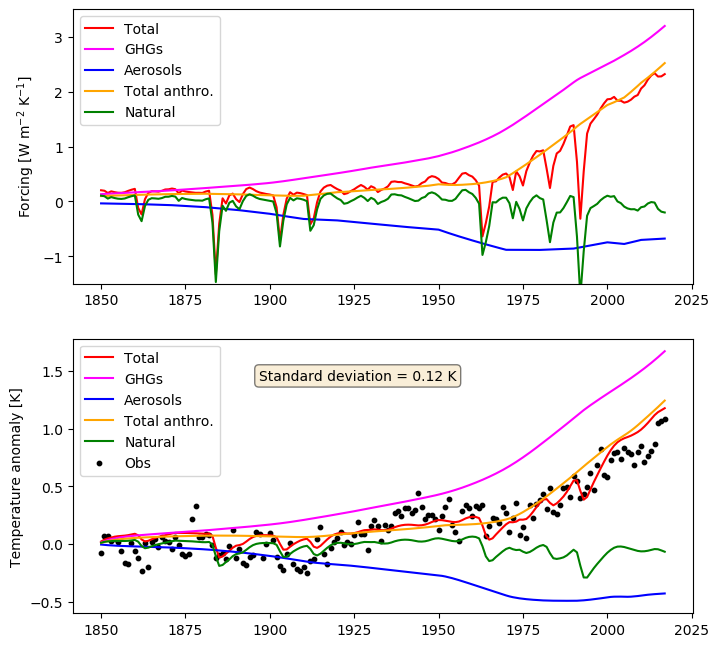

In [76]:
""" Plot the output! """

fig, ax = plt.subplots(nrows=2, dpi=100, figsize = (8,8))
ax[0].plot(Y_obs, F_tot, color='red', label='Total')
ax[0].plot(Y_obs, F_ghg, color='magenta', label='GHGs')
ax[0].plot(Y_obs, F_aer, color='blue', label='Aerosols')
ax[0].plot(Y_obs, F_ghg+F_aer, color='orange', label='Total anthro.')
ax[0].plot(Y_obs, F_nat, color='green', label='Natural')

ax[0].set_ylim(-1.5, 3.5)
ax[0].set_ylabel(r"Forcing [W m$^{-2}$ K$^{-1}$]")
ax[0].legend()


ax[1].scatter(Y_obs, T_obs, s=10, color='black', label='Obs')
ax[1].plot(Y_obs, T_tot, color='red', label='Total')
ax[1].plot(Y_obs, T_ghg, color='magenta', label='GHGs')
ax[1].plot(Y_obs, T_aer, color='blue', label='Aerosols')
ax[1].plot(Y_obs, T_ghg+T_aer, color='orange', label='Total anthro.')
ax[1].plot(Y_obs, T_nat, color='green', label='Natural')

# Calculate standard deviation between model and obs
error = round(np.std(T_obs - T_tot), 2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[1].text(0.3, 0.85, f"Standard deviation = {error} K", transform=ax[1].transAxes, bbox=props)

ax[1].set_ylabel(r"Temperature anomaly [K]")

ax[1].legend()

## Question: So, what happened?

**1) Explain the main features of the GHG, aerosol and natural radiative forcing curves.**

**2) Vary the scalings of the GHG, aerosol and natural radiative forcings – how does each affect the simulated temperatures?**

**3) Set the scalings back to 1 and instead vary the `lambda_global` parameter and re-run the model. What's the highest/lowest value you can get while still matching the historical record?**

**4) Extension: It's often suggested that climate models with a high climate sensitivity (small $\lambda$) must *also* have a strong aerosol forcing in order to match the historical record, do you agree?** </br>

To explore this question, vary the `lambda_global` and the `scale_aer` parameters simultaneously to simulate different (sensitivity, F$_{\mathrm{aer}}$) combinations. How does the model error change as a function of these two parameters? (P.S. Try a contour plot!)

You're also given that $\lambda=1.13\pm0.28 \, [\mathrm{W} \, \mathrm{m}^{-2} \, \mathrm{K}^{-1}]$ and `scale_aer`$\approx 1\pm0.3$

In [110]:
""" Wrap everything above into a function """


def historical_temp_error(scale_aer=1, lambda_global=1.13):
    """ Set model parameters """
    ocean_heat_capacity=np.array([8.2, 109.0]) # Defaults = 8.2, 109.0 [W yr m^-2 K^-1]

    """Set scalings for the anthropogenic GHG and aerosol and natural forcings (defaults=1.0)"""
    scale_ghg = 1.0
    scale_nat = 1.0


    """ Run model """
    _,F_output,_,_,_,_ = fair_scm(rcp85.Emissions.emissions,
                               temperature_function='Geoffroy',
                               aerosol_forcing="stevens",
                               lambda_global = lambda_global,
                               )

    # Subset to 1850-2017
    F_output = F_output[1850-1765:2018-1765, :]

    """ Decompose forcings into GHGs, aerosols and natural forcing """
    F_ghg = F_output[:,0] +F_output[:,1]+F_output[:,2]+F_output[:,3]+F_output[:,7]
    F_aer = F_output[:,6]+F_output[:,8]+F_output[:,9] # F_output[:,4]+F_output[:,5]
    F_nat = F_output[:,10]+F_output[:,11]+F_output[:,12]
    F_tot = F_ghg+F_aer+F_nat

    """ Re-run model to get temperature response due to decomposed forcings """
    _,_,T_ghg,_,_,_ = fair_scm(emissions=False,
                           other_rf=F_ghg,
                           temperature_function='Geoffroy',
                           aerosol_forcing="stevens",
                           useMultigas=False,
                           lambda_global = lambda_global, 
                           scale=scale_ghg
                           )

    _,_,T_aer,_,_,_ = fair_scm(emissions=False,
                           other_rf=F_aer,
                           temperature_function='Geoffroy',
                           aerosol_forcing="stevens",
                           useMultigas=False,
                           lambda_global = lambda_global, 
                           scale=scale_aer
                           )


    _,_,T_nat,_,_,_ = fair_scm(emissions=False,
                           other_rf=F_nat,
                           temperature_function='Geoffroy',
                           aerosol_forcing="stevens",
                           useMultigas=False,
                           lambda_global = lambda_global, 
                           scale=scale_nat
                           )

    T_tot = T_ghg + T_aer + T_nat
    
    err = round(np.std(T_obs - T_tot), 2)
    
    return err

In [107]:
num_vals = 20
lambda_vals = np.linspace(1.13-0.28, 1.13+0.28, num=num_vals)
scale_vals  = np.linspace(1.0-0.3, 1.0+0.3, num=num_vals)

In [108]:
%%time

T_outps = np.empty((num_vals,num_vals))

for l_idx, lam in enumerate(lambda_vals):
    for s_idx, scale in enumerate(scale_vals):
        T_outps[l_idx, s_idx] = historical_temp_error(scale_aer=scale, lambda_global=lam)

CPU times: user 3min 1s, sys: 1.26 s, total: 3min 2s
Wall time: 3min 5s


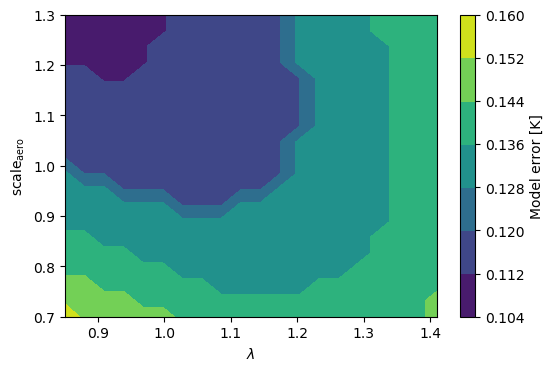

In [109]:
import matplotlib 

L, S = np.meshgrid(lambda_vals, scale_vals)

fig, ax = plt.subplots(dpi=100)
cs = ax.contourf(L,S, T_outps, cmap=matplotlib.cm.viridis)
ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"scale$_{\mathrm{aero}}$")
fig.colorbar(cs, label="Model error [K]")